In [68]:
import numpy as np
from scipy.stats import sem, t, norm
import math
import seaborn as sns

## 1. 
Perform Monte Carlo integration using R statistical programming or Python programming to estimate the value 
of π. To summarize the approach, consider the unit quarter circle illustrated in the figure below: 

Generate  𝑁 pairs  of  uniform  random  numbers (𝑥,𝑦),  where 𝑥~ 𝑈(0,1)  and 𝑦  ~ 𝑈(0,1),  and  each  (𝑥,𝑦)  pair 
represents a point in the unit square. To obtain an estimate of π, count the fraction of points that fall inside the unit quarter circle and multiply by 4. Note that the fraction of points that fall inside the quarter circle should tend to the ratio between the area of the unit quarter circle (i.e., ¼ 𝜋) as compared to area of the unit square (i.e., 1). We proceed step-by-step: 
 
__a)__ Create a function `insidecircle` that takes two inputs between 0 and 1 and returns 1 if these points fall within 
the unit circle.  

In [3]:
def insidecircle(x, y):
    if x < 0 or x > 1 or y < 0 or y > 1:
        raise Exception("Values for x and y must be between 0 and 1")
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0

__b)__ Create a function `estimatepi` that takes a single input 𝑁, generates 𝑁 pairs of uniform random numbers and 
uses `insidecircle` to produce an estimate of 𝜋 as described above. In addition to the estimate of 𝜋, `estimatepi` 
should also return the standard error of this estimate, and a 95% confidence interval for the estimate. 

In [58]:
def estimatepi(N):
    total_true = 0
    results_list = []
    for i in range(N):
        a = np.random.uniform(low=0.0, high=1.0)
        b = np.random.uniform(low=0.0, high=1.0)
        result = insidecircle(a, b) 
        results_list.append(result)
        total_true += result
    
    ## pi= 4 * (number of points generated inside the circle) / (number of points generated inside the square)
    pi_est = 4 * total_true / N
    std_error = sem(results_list)
    
    #create 95% confidence interval for population mean weight
    lower_cutoff = pi_est + t.ppf(0.025, N - 1, scale = std_error)
    upper_cutoff = pi_est + t.ppf(0.975, N - 1, scale = std_error)  
    return pi_est, std_error, (lower_cutoff, upper_cutoff)

__c)__ Use `estimatepi` to estimate 𝜋 for 𝑁 = 1000 to 10000 in increments of 500 and record the estimate, its standard 
error  and  the  upper  and  lower  bounds  of  the  95%  CI.  How  large  must  𝑁  be  in  order  to  ensure  that  your estimate of 𝜋 is within 0.1 of the true value?  

In [75]:
#How large must 𝑁 be in order to ensure that your estimate of 𝜋 is within 0.1 of the true value?
for N in range(1000, 10500, 500):
    pi_est, std_error, confidence_interval = estimatepi(N)
    if abs(pi_est - math.pi) < 0.1:
        print(f"N = {N} provides enough estimates to get within 0.1 of the true value of pi, {math.pi}. \n This estimated pi at {pi_est}.")
        value_of_N_to_use = N
        break

N = 1000 provides enough estimates to get within 0.1 of the true value of pi, 3.141592653589793. 
 This estimated pi at 3.116.


__d)__ Using the value of 𝑁 you determined in part c), run estimatepi 500 times and collect 500 different estimates of 𝜋. Produce a histogram of the estimates and note the shape of this distribution. Calculate the standard deviation of the estimates – does it match the standard error you obtained in part c)? What percentage of the estimates lies within the 95% CI you obtained in part c)?

In [78]:
def multiple_pi_estimates(value_of_N_to_use):
    pi_estimates_list = []
    for i in range(500):
        pi_est, std_error, confidence_interval = estimatepi(value_of_N_to_use)
        pi_estimates_list.append(pi_est)
    std_dev = np.std(pi_estimates_list)
    return pi_estimates_list, std_dev

In [79]:
pi_estimates_list, std_dev = multiple_pi_estimates(value_of_N_to_use)

<AxesSubplot: ylabel='Count'>

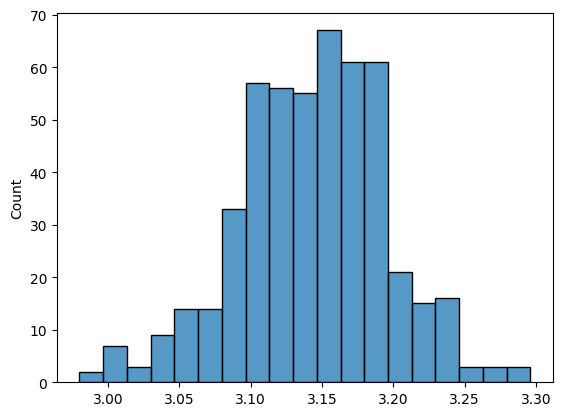

In [83]:
sns.histplot(data=pi_estimates_list)

In [105]:
within_ci = [True if i > confidence_interval[0] and i < confidence_interval[1] else False for i in pi_estimates_list]
percent_within_ci = sum(bool(x) for x in within_ci)/len(pi_estimates_list)

print(f"The standard error, {std_error}, does {'' if std_error == std_dev else 'not'} match the standard deviation, {std_dev}")
print(f"The percentage of the estimates that are within the 95% CI obtained in part c) is {percent_within_ci*100}%")


The standard error, 0.013127502859696178, does not match the standard deviation, 0.052220808726024186
The percentage of the estimates that are within the 95% CI obtained in part c) is 35.4%


## 2.  

A salesperson in a large bicycle shop is paid a bonus if he sells more than 4 bicycles a day.  The probability of 
selling more than 4 bicycles a day is only 0.40.  If the number of bicycles sold is greater than 4, the distribution of sales as shown below.  The shop has four different models of bicycles.  The amount of the bonus paid out varies by 
type.  The bonus for model A is \\$10; 40\% of the bicycles sold are of this type.  Model B accounts for 35\% of the 
sales and pays a bonus of \\$15.  Model C has a bonus rating of $20 and makes up 20\% of the sales.  Finally, a model 
D pays a bonus of \\$25 for each sale but accounts for only 5\% of the sales.  Develop a simulation model to calculate 
the bonus a salesperson can expect in a day. 
 

|Number of Bicycles Sold|  Probability |
|-----|-----|
|5  |   0.35 |
|6  |   0.45 |
|7  |   0.15 |
|8  |   0.05 |

In [151]:
def estimate_bicycles_sold():
    # Generates a random number between 0 and 1
    rand_num = np.random.random()
    
    # Probability table for selling different numbers of bicycles
    prob_table = {
        5: 0.35,
        6: 0.45,
        7: 0.15,
        8: 0.05
    }
    
    # If the random number is greater than .4, then the number of bicycles sold is 4 or less
    if rand_num > 0.4:
        return np.random.randint(1, 5)
    
    ## Function that loops through the probability table and subtracts each probability from the random number 
    ## until it finds the first number of bicycles sold for which the random number is less than or 
    ## equal to the probability
    for num_bicycles_sold, prob in prob_table.items():
        if rand_num <= prob:  ## checks to see if the randum number is less than a given value in the prob_table
            return num_bicycles_sold  ## returns the key from the table
        rand_num -= prob  # subtracts the probability from the random number
    
    # If the loop completes without returning a value, return the maximum number of bicycles sold (8)
    return 8


In [183]:
def calculate_bonus():
    # If the number of bicycles sold is less than or equal to 4, there's no bonus
    num_bicycles_sold = estimate_bicycles_sold()
    if num_bicycles_sold <= 4:
        return 0
    
    bike_list = ["A", "B", "C", "D"]
    
    # Sales distribution for different models of bicycles
    sales_distribution = {"A": 0.4, 
                          "B": 0.35, 
                          "C": 0.2, 
                          "D": 0.05}
    
    # Bonus for each model of bicycles
    bonus_rate = {"A": 10, 
                  "B": 15, 
                  "C": 20, 
                  "D": 25}
    
    # Calculate the number of bicycles sold for each model
    num_bicycles_sold_per_model = np.random.multinomial(num_bicycles_sold, list(sales_distribution.values()))
    num_bicycles_sold_per_model_dict = dict(zip(bike_list, list(num_bicycles_sold_per_model)))
    
    # Calculate the bonus for each model of bicycles
    bonus_per_model = [num_bicycles_sold_per_model_dict[model] * bonus_rate[model] for model in bike_list]
    
    # Total bonus for the day
    total_bonus = sum(bonus_per_model)
    
    return num_bicycles_sold_per_model_dict, num_bicycles_sold, total_bonus


In [186]:
## Calculate the bonus over the course of N days:
def long_term(days):
    bonus_list = []
    for day in range(days):
        num_bicycles_sold_per_model_dict, num_bicycles_sold, total_bonus = calculate_bonus()
        bonus_list.append(total_bonus)
    return total_bonus